# Introduction

*Music21* is a Python “toolkit for analyzing, searching, and transforming music in symbolic (score-based) forms” (Cuthbert 2010). It is quite a powerful musicological tool which has been used for various analytical tasks (Cuthbert 2011) and rhythm extraction in polyphonic music (Levé el al. 2011). *Music21* reads files in the humdrum and MusicXML formats, large corpora of music such as CCARH’s Kern Scores collection (https://kern.ccarh.org/) are already available. Together with IPython (Pérez; Granger 2007), an advanced Python shell, *Music21* is an appealing environment to explore, analyze and process music interactively.

*Music21* has a very good web-site, which contains instructions from installation to complex musical analyses: http://web.mit.edu/music21/

## Basics

Music21 runs in *python* (preferably in Python 3), which is versatile and open programming environment that is freely available for all operating systems. Python is considered as one of the easiest languages to learn and is often taught as a first programming language. You don’t need to be a seasoned programmer; just a little bit of Python and you will be able to get started and explore music in new ways with *music21*.

In our facilities, we have set the latest Python and *Music21* in the machines. Therefore it should be really easy to start using *Music21*. After starting Python and typing "from music21 import *", these are some of the possibilities that you can do:


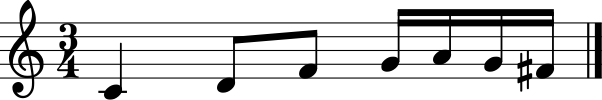

In [229]:
from music21 import *
# Display a short melody in musical notation:
converter.parse("tinynotation: 3/4 c4 d8 f g16 a g f#").show()

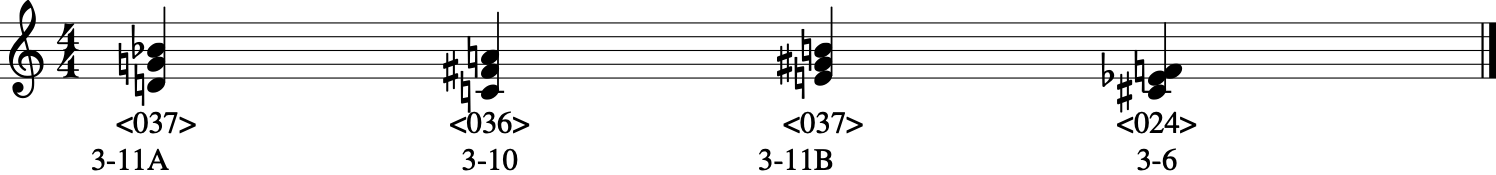

In [230]:
# Get Alban Berg's Violin Concerto twelve-tone row  
aRow = serial.getHistoricalRowByName('RowBergViolinConcerto')
bStream = stream.Stream()
# Display them as pitch classes and Forte's set classes
for i in range(0, 12, 3):
    c = chord.Chord(aRow[i:i + 3])
    c.addLyric(c.primeFormString)
    c.addLyric(c.forteClass)
    bStream.append(c)
bStream.show()

## Corpus search

Let's search the corpus for a theme that we have in mind. First we will select a suitable corpus of music and then search for a theme with or without the rhythms.

<music21.metadata.bundles.MetadataBundle {412 entries}>


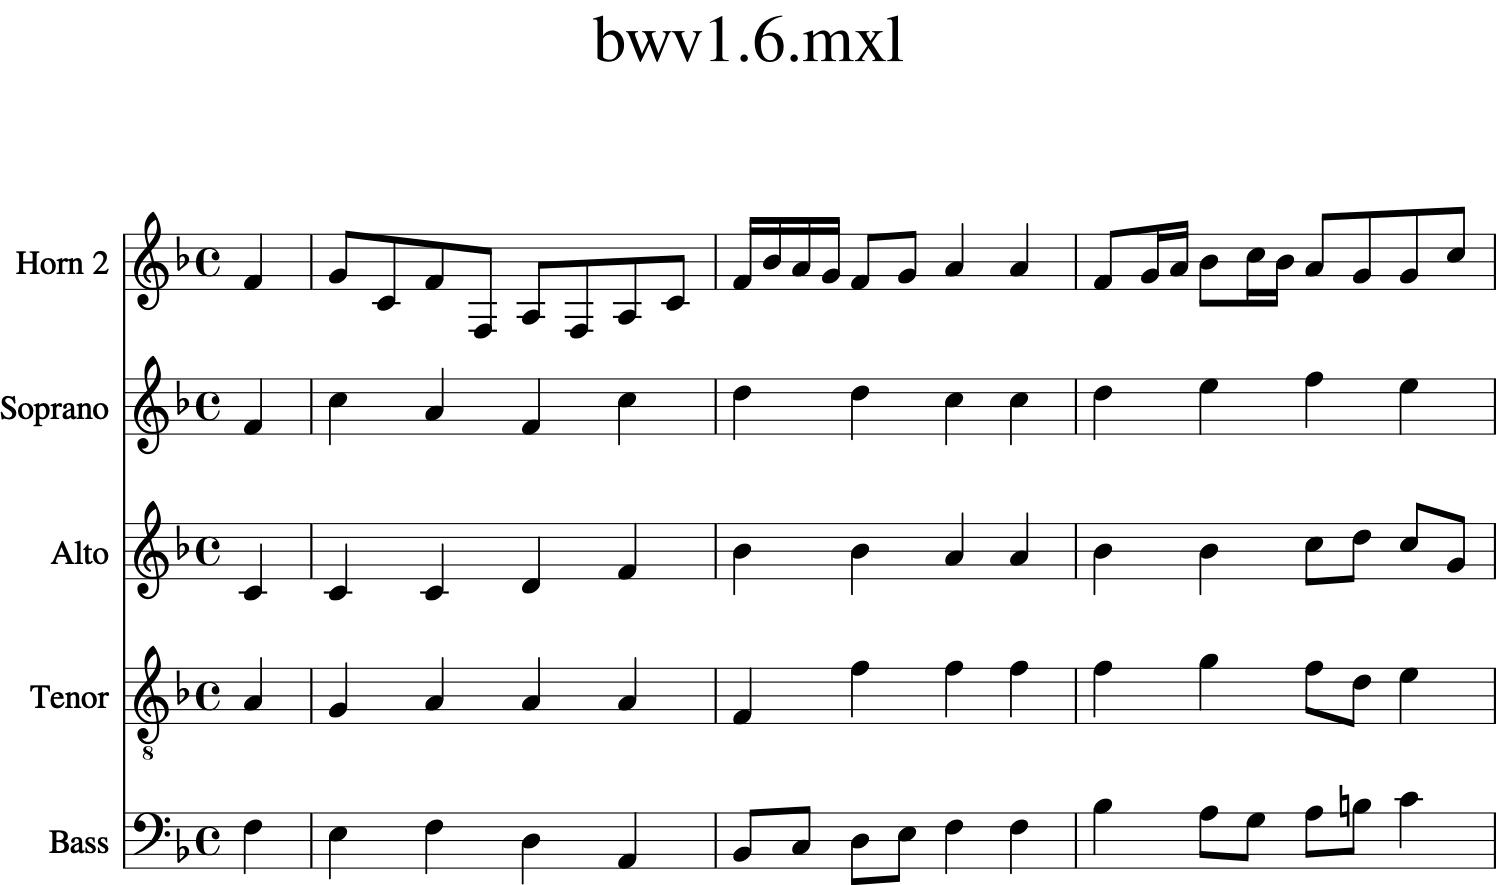

In [231]:
from music21 import *
## Select all Bach Chorales
chorales = corpus.search('bach', fileExtensions='xml')
print(chorales)            # shows how many pieces there are in the corpus
bwv1 = chorales[0].parse() # select one as an example
bwv1.measures(0, 3).show() # display the notation

In [232]:
# define a theme to search. Let's first try a simple theme (C D E F) without considering the rhythm.
searchList = [note.Note('C'), note.Note('D'), note.Note('E'), note.Note('F')] # define a search pattern C-D-E-F
s = bwv1.recurse().notes                 # prepares the piece for the search
p = search.noteNameSearch(s, searchList) # executes the search

# show were the exact matches were
for notePosition in p:
    startingNote = s[notePosition]
    startingMeasure = startingNote.measureNumber
    startingBeat = startingNote.beat
    startingPart = startingNote.getContextByClass('Part')
    print(startingNote, startingMeasure, startingBeat, startingPart)
# This is reporting in which voice, in which measure and which beat does the theme occur 

<music21.note.Note C> 2 4.0 <music21.stream.Part Soprano>
<music21.note.Note C> 8 4.0 <music21.stream.Part Soprano>
<music21.note.Note C> 2 1.5 <music21.stream.Part Bass>
<music21.note.Note C> 5 2.0 <music21.stream.Part Bass>
<music21.note.Note C> 8 1.5 <music21.stream.Part Bass>
<music21.note.Note C> 11 2.0 <music21.stream.Part Bass>


In [233]:
# OK, that was simple. Let's search for a real theme with note durations
# Let's find the theme from "Vom Himmel hoch, da komm ich her" ("From Heaven Above to Earth I Come"), 
# which was supposedly composed by Luther in 1539. We want to preserve the rhythm as well.

searchStream2 = stream.Stream([key.KeySignature(1),
                               note.Note('G4', type='quarter'),
                               note.Note('F#4', type='quarter'),
                               note.Note('E4', type='quarter'),
                               note.Note('F#4', type='quarter'),
                               note.Note('D4', type='quarter'),
                               note.Note('E4', type='quarter'),
                               note.Note('F#4', type='quarter'),
                               note.Note('G4', type='quarter')])

target1=[]
target2=[]
for i in range(len(chorales)): # loop through all 412 chorales
    tmp = chorales[i].parse()
    s = tmp.recurse().notes
    for unused in range(12): # loop through different transpositions (up to 12 semitones)
        s2=searchStream2.transpose(unused)
        entryPoints = search.noteNameRhythmicSearch(s, s2.notes)
        len1=len(entryPoints)
        target1.append(len1)
    len2=sum(target1)
    target2.append(len2)
    #print(i,target2[i])
    target1=[]
print("Done! (that took a while)")

Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that 

Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that took a while)
Done! (that 

These works contain the theme: [128, 141, 142]


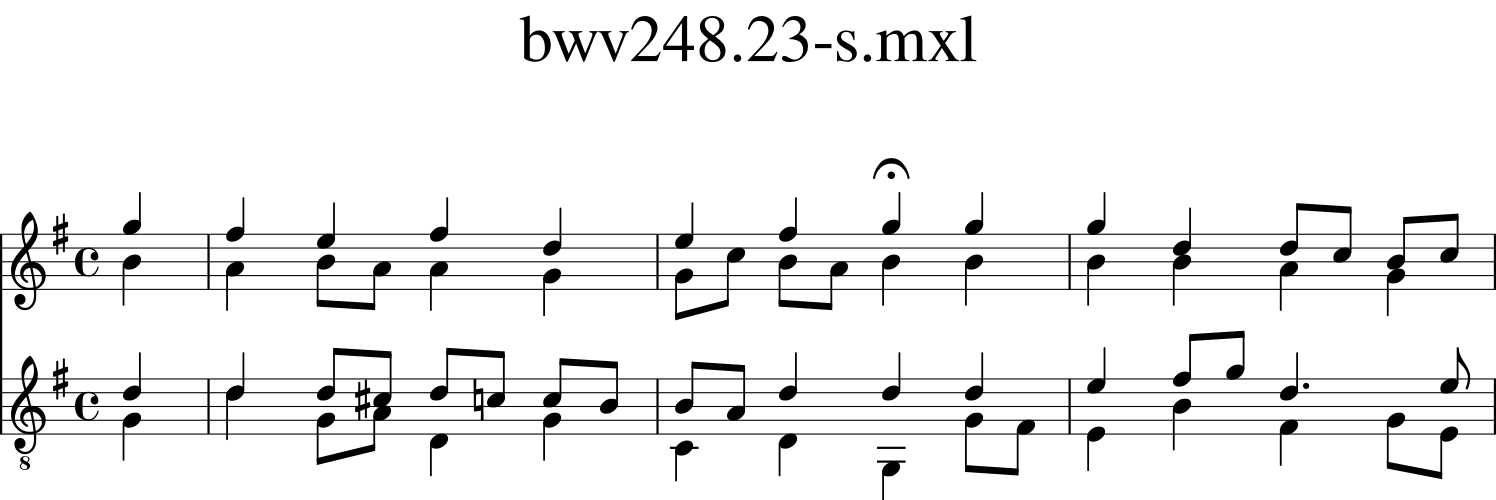

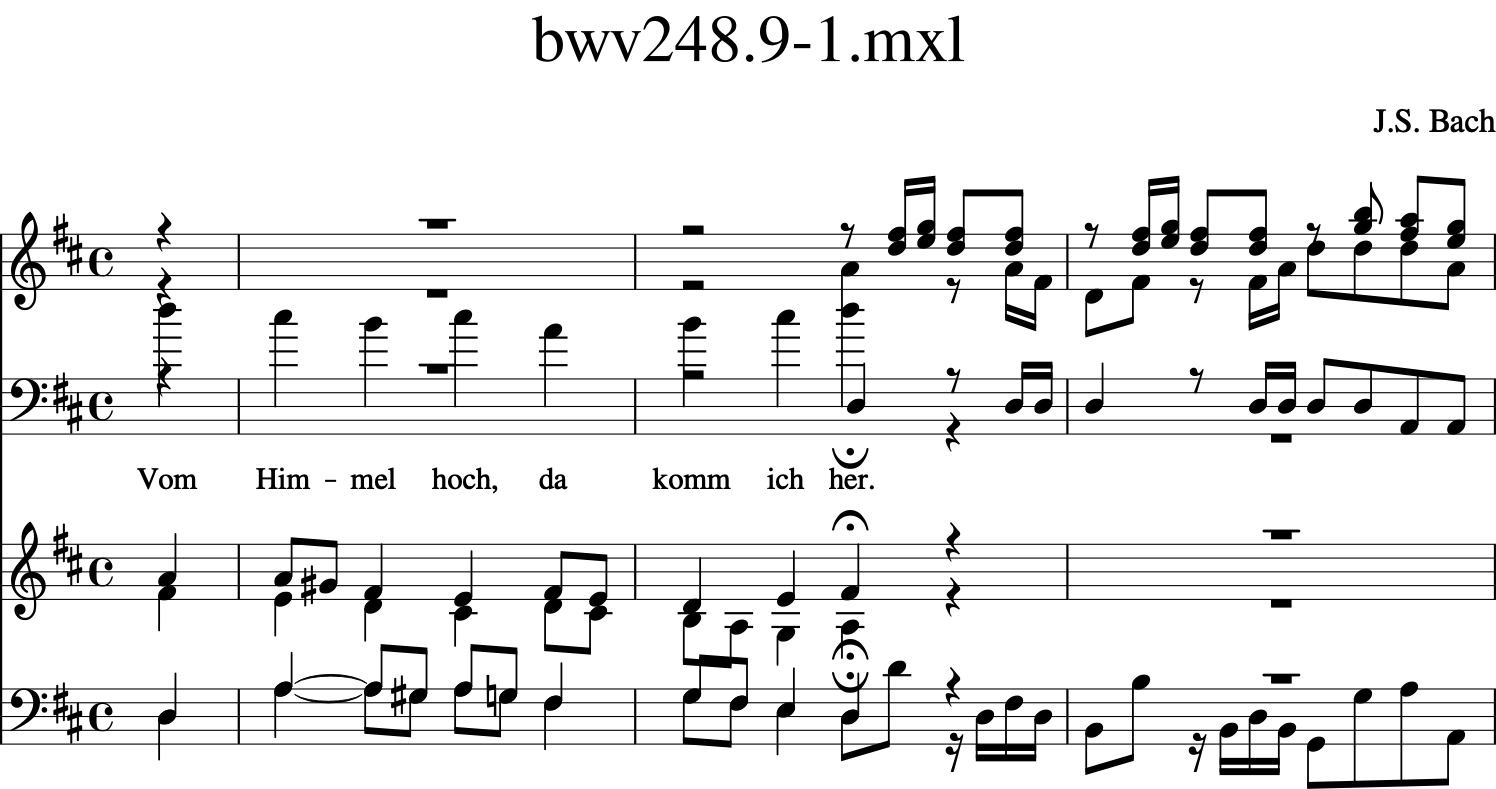

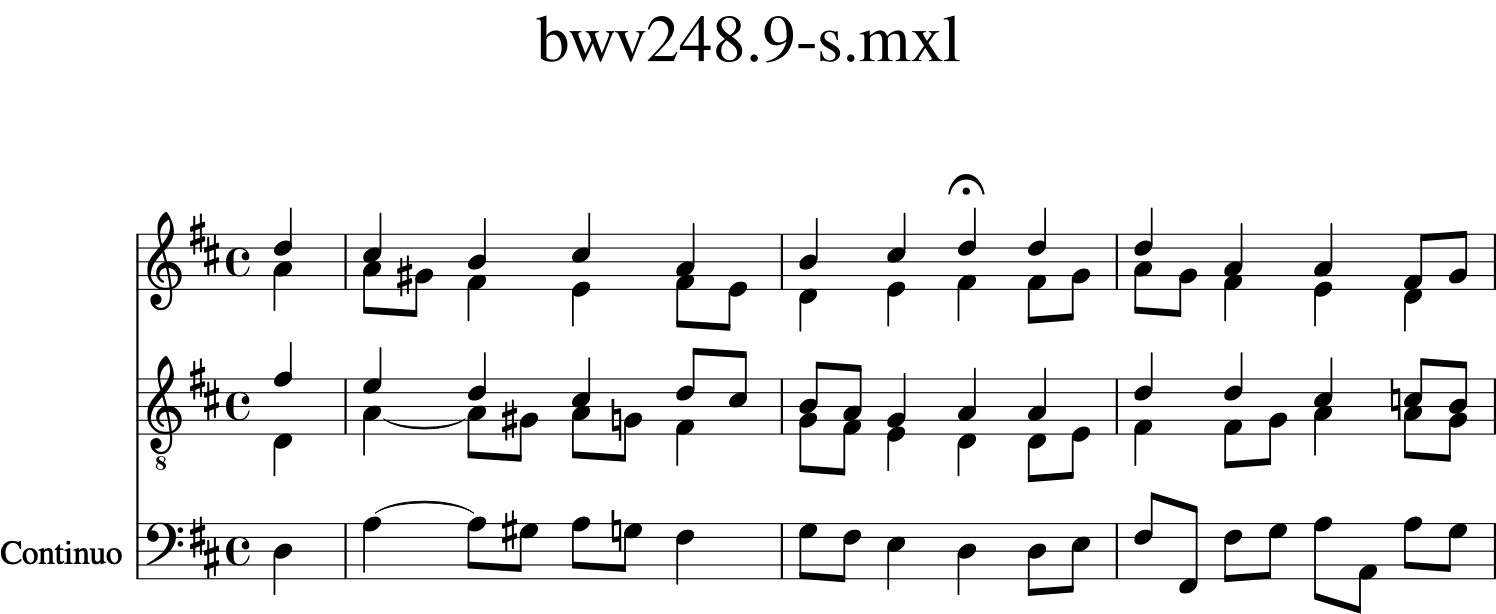

In [234]:
# Display results
hits=[i for i, x in enumerate(target2) if x]
print("These works contain the theme:",hits)

catalog = stream.Opus()

for i in range(0,len(hits)):
    tmp=chorales[hits[i]].parse()
    incipit = tmp.measures(0,3)
    catalog.insert(0, incipit.implode())
catalog.show() # Display the works that contain the theme

In [235]:
# Has the theme from "Vom Himmel hoch, da komm ich her" used earlier?

#trecento = corpus.search('trecento')
#print(trecento)

palestrina = corpus.search('palestrina')
print(palestrina)

# let's allow some rhythmic variations and remove the note durations from the search
searchStream3 = stream.Stream([key.KeySignature(1),
                               note.Note('G4'),
                               note.Note('F#4'),
                               note.Note('E4'),
                               note.Note('F#4'),
                               note.Note('D4'),
                               note.Note('E4'),
                               note.Note('F#4'),
                               note.Note('G4')])

target1=[]
target2=[]
for i in range(100):
    tmp = palestrina[i].parse()
    s = tmp.recurse().notes
    for unused in range(12): # unison to seventh
        s2=searchStream3.transpose(unused)
        entryPoints = search.noteNameSearch(s, s2.notes)
        len1=len(entryPoints)
        target1.append(len1)
    len2=sum(target1)
    target2.append(len2)
#    print(i,target2[i])
    target1=[]
print("Done! (that took a while)")
hits=[i for i, x in enumerate(target2) if x]
print("These works contain the theme:",hits)


<music21.metadata.bundles.MetadataBundle {1318 entries}>
Done! (that took a while)
These works contain the theme: [10, 12, 17, 18, 26, 27, 33, 41, 76]


[10, 12, 17, 18, 26, 27, 33, 41, 76]
<music21.note.Note B-> 10 1.0 <music21.stream.Part spine_4>


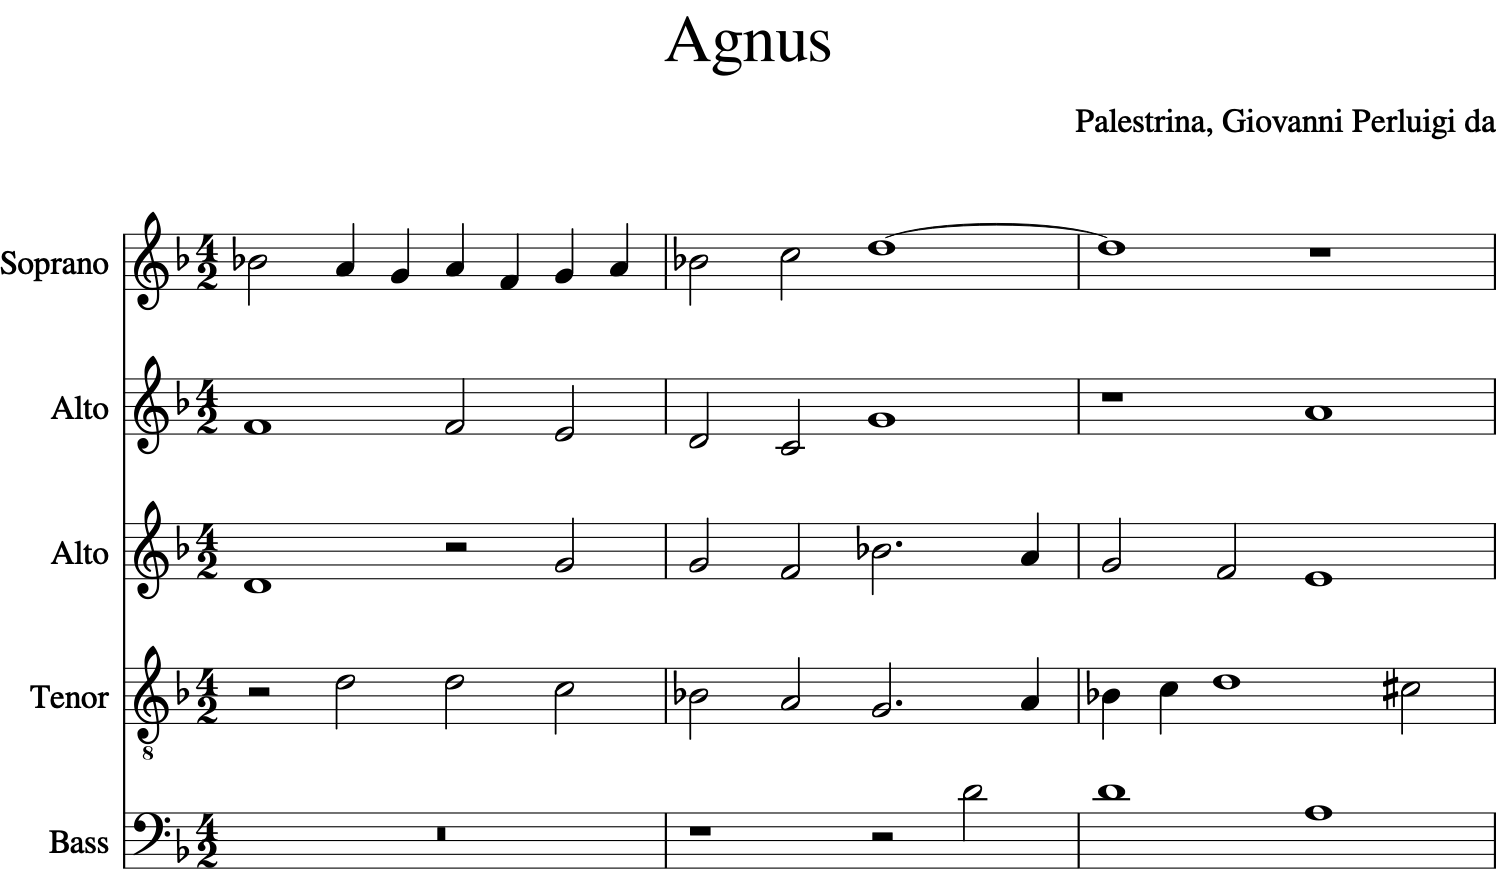

In [236]:
print(hits)
tmp=palestrina[hits[3]].parse()
s = tmp.recurse().notes                 # prepares the piece for the search
p = search.noteNameSearch(s, searchStream3) # executes the search
target1=[]
target2=[]
for unused in range(12): # unison to seventh
    s2=searchStream3.transpose(unused)
    entryPoints = search.noteNameSearch(s, s2.notes)
    len1=len(entryPoints)
    target1.append(len1)
tr=[i for i, x in enumerate(target1) if x]

# show were the exact matches were
s2=searchStream3.transpose(tr[0])
p = search.noteNameSearch(s, s2.notes) # executes the search
for notePosition in p:
    startingNote = s[notePosition]
    startingMeasure = startingNote.measureNumber
    startingBeat = startingNote.beat
    startingPart = startingNote.getContextByClass('Part')
    print(startingNote, startingMeasure, startingBeat, startingPart)
tmp.measures(10, 12).show()


## Check the keys

Were the Bach chorales written in specific keys? Perhaps keys with only one or two sharps and flats are regularly utilised since they are easier to perform? Are there more chorales in major mode than in minor? Let's look at the key distribution across chorales.

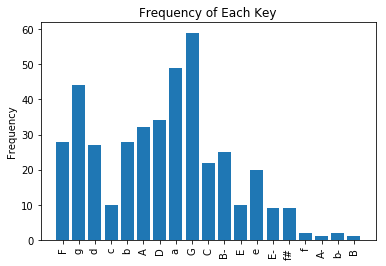

{'major': 221, 'minor': 191}


In [237]:
from music21 import*
import matplotlib.pyplot as plt

chorales = corpus.search('bach', fileExtensions='xml')
dict = {}
dict2 = {}

for chorale in chorales:
   score = corpus.parse(chorale)
   key = score.analyze('key').tonicPitchNameWithCase
   key2 = score.analyze('key').mode
   dict[key] = dict[key] + 1 if key in dict.keys() else 1
   dict2[key2] = dict2[key2] + 1 if key2 in dict2.keys() else 1

# Graphics
ind = [i for i in range(len(dict))]
fig, ax = plt.subplots()
ax.bar(ind, dict.values())
ax.set_title('Frequency of Each Key')
ax.set_ylabel('Frequency')
plt.xticks(ind, dict.keys(), rotation='vertical')
plt.show()

print(dict2)


Yes, the preferred keys are G, D, F, and Bb major. There are slightly more chorales in major key (221) than in minor key (191). 

## Compare vocal ranges

Are the basses expected to sing over a larger range than tenors? Has the vocal range tended to be the same for SATB works over the centuries? Of course we do not always know what pitch was the score originally mapped onto but at least the vocal ranges should be comparable between in soprano, alto, tenor and bass voices. What the interval structures, which voices tend to have the largest leaps?

In [238]:
import statistics
# Start with Bach chorales
chorales = corpus.search('bach', fileExtensions='xml')

soprano_range = []
alto_range = []
tenor_range = []
bass_range = []
for chorale in chorales:
    s = corpus.parse(chorale)
    for el in s.recurse().parts:
        #print(el.offset, el, el.analyze('range').semitones)
        #print(el.partName)
        if 'Soprano' in el.partName:
            soprano_range.append(el.analyze('range').semitones)
        if 'Alto' in el.partName:
            alto_range.append(el.analyze('range').semitones)
        if 'Tenor' in el.partName:
            tenor_range.append(el.analyze('range').semitones)
        if 'Bass' in el.partName:
            bass_range.append(el.analyze('range').semitones)

print('Soprano', round(statistics.mean(soprano_range),2))
print('Alto', round(statistics.mean(alto_range,2))
print('Tenor', round(statistics.mean(tenor_range,2))
print('Bass', round(statistics.mean(bass_range),2))

SyntaxError: invalid syntax (<ipython-input-238-35bff0614b8c>, line 25)

Skips are larger in Bass

In [ ]:
import statistics
# Try with Monteverdi
chorales = corpus.search('monteverdi', fileExtensions='xml')
print(chorales)
soprano_range = [];alto_range = [];tenor_range = [];bass_range = []
for chorale in chorales:
    s = corpus.parse(chorale)
    for el in s.recurse().parts:
#        print(el.offset, el, el.analyze('range').semitones)
        if 'Canto' in el.partName:
            soprano_range.append(el.analyze('range').semitones)
        if 'Alto' in el.partName:
            alto_range.append(el.analyze('range').semitones)
        if 'Tenor' in el.partName:
            tenor_range.append(el.analyze('range').semitones)
        if 'Basso' in el.partName:
            bass_range.append(el.analyze('range').semitones)

print('Canto', round(statistics.mean(soprano_range),2))
print('Alto', round(statistics.mean(alto_range),2))
print('Tenor', round(statistics.mean(tenor_range),2))
print('Basso', round(statistics.mean(bass_range),2))


## Visualise music


In [ ]:
from music21 import *
schoenberg = corpus.parse('schoenberg/opus19', 2)
schoenberg.measures(1, 4).show() # Show first 4 bars

In [ ]:
# Let's look at the pianoroll of the soprano part
voice = schoenberg.parts[0] # take the Soprano (0=first part)
voice.measures(1, 7).plot() # Piano roll


In [ ]:
# let's look at the distributions of pitches
schoenberg.plot('histogram', 'pitchClass') # plot the distribution of pitch-classes

schoenberg.plot('scatter', 'pitch', 'quarterLength')

schoenberg.plot('horizontalbarweighted')

schoenberg.plot('3dbars')


## Chord analysis

In [ ]:
# Let's create some simple chords
cMajor = chord.Chord(["C4","G4","E5"])
cMajor.duration.type = 'half'
kc = key.Key('C')
cMajor2 = cMajor.closedPosition()

fMajor = chord.Chord("C F A")
fMajor.duration.type = 'half'

gMajor7 = chord.Chord("B D F G")
gMajor7.duration.type = 'half'

# Music21 can tell you quite useful things about any chord: for instance
print(gMajor7.commonName)
print(gMajor7.quality)
print(gMajor7.forteClass)

# We can analyse the chords and put chord names into the score
cMajor.lyric = roman.romanNumeralFromChord(cMajor, kc).figure
fMajor.lyric= roman.romanNumeralFromChord(fMajor, kc).figure
gMajor7.lyric= roman.romanNumeralFromChord(gMajor7, kc).figure
cMajor2.lyric= roman.romanNumeralFromChord(cMajor2, kc).figure

# This is how to combine the chords into one stream
stream1 = stream.Stream()
stream1.append(cMajor)
stream1.append(fMajor)
stream1.append(gMajor7)
stream1.append(cMajor2)
stream1.show()

In [ ]:
# Chord analysis
b = corpus.parse('bwv66.6')
b.measures(0, 2).show()

# Slice the chords for each beat with chordify
bChords = b.chordify()
bChords.metadata.movementName = 'Chord reduction'
bChords.measures(0, 2).show()

b.insert(0, bChords)

for c in bChords.recurse().getElementsByClass('Chord'):
    c.closedPosition(forceOctave=4, inPlace=True)

for c in bChords.recurse().getElementsByClass('Chord'):
    rn = roman.romanNumeralFromChord(c, key.Key('A'))
    c.addLyric(str(rn.figure))

bChords.metadata.movementName = 'Chord reduction with Roman Numerals'
bChords.measures(0,2).show()


## Compare rhythms

Ani Patel and Daniele Steele proposed that the rhythm of language influences the rhythms of the compositions. 


